# TAREFA DATASET KAGGLE


Para esta fase, o objetivo é alcançar o melhor resultado possível com o dataset da competição fornecido pelos docentes na previsão do nível de incidentes rodoviários, numa determinada hora, na cidade de Guimarães.

### **1.** Importar as bibliotecas essenciais do Python para a elaboração desta tarefa

In [4]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

### **2.** Carregar o dataset para um dataframe da biblioteca Pandas

In [5]:
df = pd.read_csv('docs/training_data.csv', encoding="utf-8", skipinitialspace=True)
df_teste = pd.read_csv('docs/test_data.csv', encoding="utf-8", skipinitialspace=True)

### **3.** Obtenção de informação acerca do dataset: tipos de dados das features, conteúdo do dataset e estatística

* **tipos de dados das features**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


* **conteúdo do dataset**

In [7]:
df.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


* **estatística**

In [8]:
df.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


Distribuição da feature target "incidents"

<AxesSubplot:>

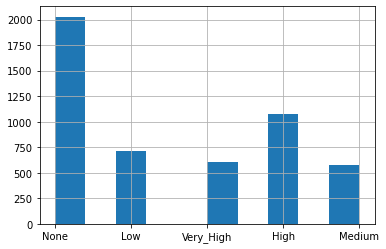

In [9]:
df["incidents"].hist()

Análise dos valores únicos no dataset

In [10]:
for c in df:
    print(f"{c}: {df[c].unique()}")
    print(f"Quantidade: {df[c].nunique()}")
    print("---------------------------------------")

city_name: ['Guimaraes']
Quantidade: 1
---------------------------------------
magnitude_of_delay: ['UNDEFINED' 'MAJOR' 'MODERATE']
Quantidade: 3
---------------------------------------
delay_in_seconds: [   0  385   69 ...  684 8360  896]
Quantidade: 1186
---------------------------------------
affected_roads: [',' 'N101,' 'N101,R206,N105,N101,N101,N101,N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101,' 'N101,N101,N101,N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,N101,'
 'N101,N101,N206,N105,N309,N309,N101,N101,IC5,N101,N101,N105,N101,N206,N101,N101,N101,IC5,N101,N101,N105,N101,N101,N105,N309,N101,N101,N101,N101,IC5,N101,N105'
 'N101,N101,N101,N101,N105,N101,N101' 'N101,N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,' nan 'N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,N206,N105,N101,N101,N105,N105,N101,N101,N101,N101,R206,N101,N101,N105'
 'N101,N101,N206,R206,N206,N101,N105,N206,N309,N101,N101,N101,N101,N101,N105,N206

TODO: tabelinha gira da análise da tabela acima

### **4.** Preparação dos dados

In [11]:
df.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [12]:
df.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

**Remoção da feature "avg_precipitation"**

In [13]:
#Possui informação incompleta
df = df.drop('avg_precipitation', axis=1)
df_teste = df_teste.drop('avg_precipitation', axis=1)

**Transformação da coluna *record_date* nas colunas ano, mês, dia, hora e minuto**

In [14]:
df['record_date'] = pd.to_datetime(df['record_date'],format='%Y-%m-%d %H:%M', errors='coerce')
assert df['record_date'].isnull().sum() == 0,'missing record date'

df['record_date_year'] = df['record_date'].dt.year
df['record_date_month'] = df['record_date'].dt.month
df['record_date_day'] = df['record_date'].dt.day
df['record_date_hour'] = df['record_date'].dt.hour
df['record_date_minute'] = df['record_date'].dt.minute
df = df.drop('record_date', axis=1)

df.head()


df_teste['record_date'] = pd.to_datetime(df_teste['record_date'],format='%Y-%m-%d %H:%M', errors='coerce')
assert df_teste['record_date'].isnull().sum() == 0,'missing record date'

df_teste['record_date_year'] = df_teste['record_date'].dt.year
df_teste['record_date_month'] = df_teste['record_date'].dt.month
df_teste['record_date_day'] = df_teste['record_date'].dt.day
df_teste['record_date_hour'] = df_teste['record_date'].dt.hour
df_teste['record_date_minute'] = df_teste['record_date'].dt.minute
df_teste = df_teste.drop('record_date', axis=1)

**Remoção das features "city_name", "record_date_year" e "record_date_minute"**

In [15]:
#como apenas existe um valor para "city_name", esta coluna pode ser removida
df = df.drop('city_name', axis=1)
df_teste = df_teste.drop('city_name', axis=1)

#o mesmo se aplica para o ano e minuto
df = df.drop('record_date_year', axis=1)
df = df.drop('record_date_minute', axis=1)

df_teste = df_teste.drop('record_date_year', axis=1)
df_teste = df_teste.drop('record_date_minute', axis=1)

**Transformação da feature "magnitude_of_delay" em valores numéricos**

In [16]:
df['magnitude_of_delay'].unique()

array(['UNDEFINED', 'MAJOR', 'MODERATE'], dtype=object)

In [17]:
replace_map = {'magnitude_of_delay': {'UNDEFINED':0 ,'MODERATE': 1, 'MAJOR': 2}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour
0,0,0,",",DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,3,15,23
1,0,385,"N101,",DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,12,25,18
2,0,69,",",LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,3,12,15
3,2,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,9,29,9
4,0,0,"N101,N101,N101,N101,N101,",LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,6,13,11


**Tratamento da feature "affected_roads"**

* Tratamento dos missing values

In [18]:
df['affected_roads'].fillna(',',inplace=True) #tratar de missing values
df_teste['affected_roads'].fillna(',',inplace=True) #tratar de missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   int64  
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      5000 non-null   object 
 3   luminosity          5000 non-null   object 
 4   avg_temperature     5000 non-null   float64
 5   avg_atm_pressure    5000 non-null   float64
 6   avg_humidity        5000 non-null   float64
 7   avg_wind_speed      5000 non-null   float64
 8   avg_rain            5000 non-null   object 
 9   incidents           5000 non-null   object 
 10  record_date_month   5000 non-null   int64  
 11  record_date_day     5000 non-null   int64  
 12  record_date_hour    5000 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 507.9+ KB


* Separação das ruas e remoção de ruas repetidas

In [19]:
affected_roads = {}

#Separação das ruas e remoção de ruas repetidas
for row in df['affected_roads']:
    roads = list(dict.fromkeys(row.split(',')))
    for road in roads:
        affected_roads[road] = []

for row in df['affected_roads']:
    roads = list(dict.fromkeys(row.split(',')))
    for road in affected_roads:
        if road in roads:
            affected_roads[road].append(1)
        else:
            affected_roads[road].append(0)

        
affected_roads = pd.DataFrame.from_dict(affected_roads)
df = df.drop('affected_roads',axis=1)

for column in affected_roads:
    df[column] = affected_roads[column]
    
#######################################################################
affected_roads = {}

for row in df_teste['affected_roads']:
    roads = list(dict.fromkeys(row.split(',')))
    for road in roads:
        affected_roads[road] = []

for row in df_teste['affected_roads']:
    roads = list(dict.fromkeys(row.split(',')))
    for road in affected_roads:
        if road in roads:
            affected_roads[road].append(1)
        else:
            affected_roads[road].append(0)

        
affected_roads = pd.DataFrame.from_dict(affected_roads)
df_teste = df_teste.drop('affected_roads',axis=1)

for column in affected_roads:
    df_teste[column] = affected_roads[column]
    
df

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,6,13,11,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High,4,13,0,1,1,0,0,0,0,0,0,0,0,0
4996,0,0,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None,7,6,14,0,1,0,0,0,0,0,0,0,0,0
4997,0,0,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None,3,18,3,1,0,0,0,0,0,0,0,0,0,0
4998,0,0,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None,11,2,6,0,1,0,0,0,0,0,0,0,0,0


**Transformação da feature "luminosity" em valores numéricos**

In [20]:
df['luminosity'].unique()

array(['DARK', 'LIGHT', 'LOW_LIGHT'], dtype=object)

In [21]:
replace_map = {'luminosity': {'LOW_LIGHT':0 ,'LIGHT': 1, 'DARK': 2}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,2,12.0,1013.0,70.0,1.0,Sem Chuva,None,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,2,12.0,1007.0,91.0,1.0,Sem Chuva,None,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,1,14.0,1025.0,64.0,0.0,Sem Chuva,Low,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,1,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,1,27.0,1020.0,52.0,1.0,Sem Chuva,High,6,13,11,1,1,0,0,0,0,0,0,0,0,0


**Tranformação da feature "avg_rain" em valores numéricos**

In [22]:
df['avg_rain'].unique()

array(['Sem Chuva', 'chuva moderada', 'chuva fraca', 'chuva forte'],
      dtype=object)

In [23]:
replace_map = {'avg_rain': {'Sem Chuva':0 ,'chuva fraca': 1, 'chuva moderada': 2,'chuva forte' : 3}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,2,12.0,1013.0,70.0,1.0,0,None,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,2,12.0,1007.0,91.0,1.0,0,None,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,1,14.0,1025.0,64.0,0.0,0,Low,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,1,15.0,1028.0,75.0,1.0,0,Very_High,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,1,27.0,1020.0,52.0,1.0,0,High,6,13,11,1,1,0,0,0,0,0,0,0,0,0


**Transformação da feature "incidents" em valores numéricos**

In [24]:
replace_map = {'incidents': {'None':0 ,'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,2,12.0,1013.0,70.0,1.0,0,0,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,2,12.0,1007.0,91.0,1.0,0,0,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,1,14.0,1025.0,64.0,0.0,0,1,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,1,15.0,1028.0,75.0,1.0,0,4,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,1,27.0,1020.0,52.0,1.0,0,3,6,13,11,1,1,0,0,0,0,0,0,0,0,0


### 5. Aplicação de modelos de machine learning

#### 5.1. Decision Tree Classifier

Imports necessários para a implementação deste modelo

In [25]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn import tree

In [26]:
x = df.drop("incidents", axis = 1)

In [27]:
y = df.incidents

In [28]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2022)

Treino do modelo

In [29]:
clf = DecisionTreeClassifier(random_state=2022)
clf = clf.fit(x_train,y_train)

Visualização da árvore de decisão

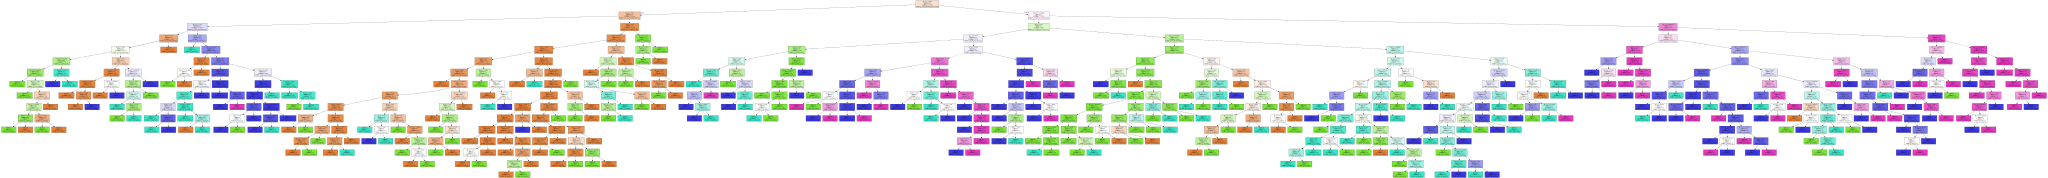

In [30]:
tree.export_graphviz(clf,
                     out_file="tree_dsCompeticao.dot",
                     filled = True)

from graphviz import Source
Source.from_file("tree_dsCompeticao.dot")

Geração de previsões

In [31]:
predictions = clf.predict(x_test)
pd.DataFrame(predictions)

,0
0,1
1,4
2,0
3,0
4,1
...,...
1245,2
1246,4
1247,2
1248,3


In [32]:
y_test

3419    1
178     4
3721    0
3087    0
3685    1
       ..
1266    2
4556    4
1371    2
4911    3
3642    3
Name: incidents, Length: 1250, dtype: int64

Avaliação do modelo

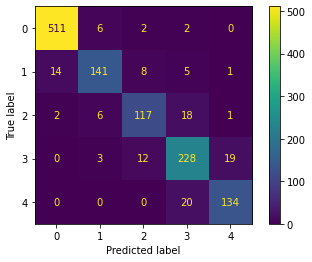

In [33]:
plot_confusion_matrix(clf, x_test, y_test) 

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       521
           1       0.90      0.83      0.87       169
           2       0.84      0.81      0.83       144
           3       0.84      0.87      0.85       262
           4       0.86      0.87      0.87       154

    accuracy                           0.90      1250
   macro avg       0.88      0.87      0.88      1250
weighted avg       0.90      0.90      0.90      1250



In [35]:
mean_absolute_error(y_test,predictions)

0.1104

**Geração do ficheiro de submissão para o Decision Tree**

In [36]:
#Função genérica que irá ser reutilizada para os proximos modelos
def download_submission_file(model, df_teste, filename):
    predictions_dfT = model.predict(df_teste)
    pd.DataFrame(predictions_dfT)
    
    replace_map = {'Incidents': {"0":'None' ,"1":'Low', "2":'Medium', "3":'High', "4":'Very_High'}}
    
    predictions_dfT = pd.DataFrame(predictions_dfT, columns = ["Incidents"])
    predictions_dfT["Incidents"] = predictions_dfT["Incidents"].astype(str)
    predictions_dfT.replace(replace_map,inplace=True)
    predictions_dfT.index+=1
    predictions_dfT.head()
    
    from pathlib import Path
    filepath = Path(filename)
    predictions_dfT.to_csv(filepath, index = True)

In [37]:
download_submission_file(clf, df_teste, "submission_files/decisionTree.csv")

#### 5.2 Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [39]:
x = df.drop("incidents", axis = 1)
x

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,2,12.0,1013.0,70.0,1.0,0,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,2,12.0,1007.0,91.0,1.0,0,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,1,14.0,1025.0,64.0,0.0,0,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,1,15.0,1028.0,75.0,1.0,0,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,1,27.0,1020.0,52.0,1.0,0,6,13,11,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,2,13.0,1021.0,56.0,0.0,0,4,13,0,1,1,0,0,0,0,0,0,0,0,0
4996,0,0,1,19.0,1017.0,68.0,0.0,0,7,6,14,0,1,0,0,0,0,0,0,0,0,0
4997,0,0,2,13.0,1023.0,47.0,2.0,0,3,18,3,1,0,0,0,0,0,0,0,0,0,0
4998,0,0,2,12.0,1014.0,93.0,2.0,0,11,2,6,0,1,0,0,0,0,0,0,0,0,0


In [40]:
y = df.incidents
y

0       0
1       0
2       1
3       4
4       3
       ..
4995    3
4996    0
4997    0
4998    0
4999    0
Name: incidents, Length: 5000, dtype: int64

In [41]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2022)

In [42]:
lr = LogisticRegression(random_state=2022, solver="liblinear") #mudar solver?

In [43]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=2022, solver='liblinear')

In [44]:
predictions_lr = lr.predict(x_test)
predictions_lr

array([0, 1, 0, ..., 3, 3, 3], dtype=int64)

In [45]:
y_test

3419    1
178     4
3721    0
3087    0
3685    1
       ..
1266    2
4556    4
1371    2
4911    3
3642    3
Name: incidents, Length: 1250, dtype: int64

In [46]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       521
           1       0.58      0.41      0.48       169
           2       0.62      0.03      0.07       144
           3       0.60      0.78      0.68       262
           4       0.79      0.78      0.79       154

    accuracy                           0.73      1250
   macro avg       0.68      0.60      0.58      1250
weighted avg       0.71      0.73      0.68      1250



In [47]:
download_submission_file(lr, df_teste, "submission_files/logisticRegression.csv")

#### 5.3 Support Vector Machine

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2022)

In [70]:
from sklearn.svm import SVC

In [71]:
model = SVC(random_state=2022)
model.fit(x_train,y_train)

SVC(random_state=2022)

In [78]:
y_pred = model.predict(x_test)
pd.DataFrame(y_pred)

,0
0,0
1,1
2,0
3,0
4,0
...,...
1245,0
1246,4
1247,0
1248,0


In [83]:
y_test

3419    1
178     4
3721    0
3087    0
3685    1
       ..
1266    2
4556    4
1371    2
4911    3
3642    3
Name: incidents, Length: 1250, dtype: int64

In [84]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.57      0.98      0.72       521
           1       0.44      0.43      0.44       169
           2       1.00      0.00      0.00       144
           3       0.47      0.09      0.15       262
           4       0.81      0.70      0.75       154

    accuracy                           0.57      1250
   macro avg       0.66      0.44      0.41      1250
weighted avg       0.61      0.57      0.48      1250



In [85]:
download_submission_file(model, df_teste, "submission_files/svm.csv")

#### 5.4 Redes neuronais

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import optimizers
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

In [120]:
x = df.drop('incidents',axis=1)
y = df[['incidents']]

In [121]:
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(x)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
x_scaled = pd.DataFrame(scaler_X.transform(x[x.columns]), columns=x.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [122]:
x_scaled.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0.0,0.000000,1.0,0.323529,0.457143,0.680851,0.1,0.0,0.181818,0.466667,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.012386,1.0,0.323529,0.285714,0.904255,0.1,0.0,1.000000,0.800000,0.782609,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.002220,0.5,0.382353,0.800000,0.617021,0.0,0.0,0.181818,0.366667,0.652174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.073899,0.5,0.411765,0.885714,0.734043,0.1,0.0,0.727273,0.933333,0.391304,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.5,0.764706,0.657143,0.489362,0.1,0.0,0.454545,0.400000,0.478261,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
y_scaled.head()

,incidents
0,0.00
1,0.00
2,0.25
3,1.00
4,0.75


In [124]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled,test_size=0.2,random_state=2022)

In [125]:
def build_model(activation = "relu", learning_rate = 0.01):
    #Create a sequential model (with three layers - last one is the output)
    model = Sequential()
    model.add(Dense(16, input_dim = 5, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = "relu"))
    
    #Compile the model
    #Define the loss function, the otimizer and metrics to be used
    model.compile(
        loss = "mae",
        optimizer = optimizers.Adam(learning_rate),
        metrics = ["mae", "mse"])
    return model

In [126]:
model = build_model()
model.summary()

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_264 (Dense)            (None, 16)                96        
_________________________________________________________________
dense_265 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_266 (Dense)            (None, 1)                 9         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [127]:
TUNING_DICT = {
    "activation" :    ["relu", "sigmoid"],
    "learning_rate" : [0.01, 0.001]
}

In [128]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2022)

model = KerasRegressor(build_fn = build_model, epochs = 20, batch_size = 32)
grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT,
                           cv = kf,
                           scoring = "neg_mean_absolute_error",
                           refit = "True",
                           verbose = 1)

grid_search.fit(x_train, y_train, validation_split = 0.2) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/20
Epoch 1/20


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/20
Epoch 1/20
Epoch 1/20


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/20
Epoch 1/20
Epoch 1/20


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/20
Epoch 1/20
Epoch 1/20


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/20
Epoch 1/20
Epoch 1/20


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/20
Epoch 1/20
Epoch 1/20


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/20
Epoch 1/20
Epoch 1/20


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/20


ValueError: in user code:

    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_109 is incompatible with the layer: expected axis -1 of input shape to have value 5 but received input with shape (32, 22)


In [129]:
#summarize results
print("Best: %f using %s" %(grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" %(mean, stdev, param))

Best: nan using {'activation': 'relu', 'learning_rate': 0.01}


AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [130]:
#Our best model (remember we set refit=True?)
best_mlp_model = grid_search.best_estimator_

In [131]:
from livelossplot import PlotLossesKerasTF

In [132]:
best_mlp_model.fit(x_train, y_train, epochs = 20,
                   validation_data = (x_test, y_test),
                   callbacks = [PlotLossesKerasTF()], verbose = 1)

Epoch 1/20


ValueError: in user code:

    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_110 is incompatible with the layer: expected axis -1 of input shape to have value 5 but received input with shape (32, 22)


In [134]:
#Obtain predictions
predictions = best_mlp_model.predict(x_test)
predictions = predictions.reshape(predictions.shape[0], 1)
predictions[:5]

ValueError: in user code:

    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_110 is incompatible with the layer: expected axis -1 of input shape to have value 5 but received input with shape (None, 22)


In [135]:
#And now let's unscale the model's predictions to see real prices!
predictions_unscaled = scaler_y.inverse_transform(y_test)
predictions_unscaled[:5]

array([[1.],
       [4.],
       [0.],
       [0.],
       [1.]])

In [136]:
#Let's unscale y_test to get the original values
y_test_unscaled = scaler_y.inverse_transform(predictions)
y_test_unscaled[:5]

ValueError: Expected 2D array, got 1D array instead:
array=[1. 4. 0. ... 2. 3. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [137]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

ValueError: Found input variables with inconsistent numbers of samples: [1000, 1250]

In [138]:
download_submission_file(best_mlp_model, df_teste, "submission_files/redeNeuronal.csv")

ValueError: in user code:

    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_110 is incompatible with the layer: expected axis -1 of input shape to have value 5 but received input with shape (None, 22)
